# <font color='#1a5276'> <b> <center> Datasets and Transformations </center> </b> </font>

## <font color='blue'>  Table of Contents </font>

1. [Introduction](#1)
2. [Setup](#2)
3. [Simple Dataset](#3) <br>
    3.1. [Transformations](#3.1) <br>
    3.2. [Composition](#3.2) <br>
4. [Image Dataset](#4) <br>
    4.1. [Loading data](#4.1) <br>
    4.2. [Create a dataset class](#4.2) <br>
    4.3. [Torchvision Transforms](#4.3) <br>
5. [Built-in datasets](#5)
6. [References](#references)

<a name="1"></a>
## <font color='blue'> <b> 1. Intro </b> </font>

PyTorch provides a powerful framework for building and training machine learning models. One of its key strengths lies in its robust dataset and data transformation utilities, which streamline data preparation and preprocessing workflows.

This notebook explores how to work with datasets and transformations in PyTorch.

<a name="2"></a>
## <font color='blue'> <b> 2. Setup</b> </font>

In [26]:
import torch
from torch.utils.data import Dataset
torch.manual_seed(1)

import os
import pandas as pd

from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

<a name="3"></a>
## <font color='blue'> <b> 3. Simple Dataset </b> </font>

We will create our own dataset class.

In [3]:
class ExampleSet(Dataset):
    """
    A simple example dataset for illustration.
    
    Attributes:
        len (int): The length of the dataset.
        x (Tensor): A tensor of input data.
        y (Tensor): A tensor of target labels.
        transform (callable, optional): A transform to apply to the data (default is None).
    """
    
    def __init__(self, length=10, transform=None):
        """
        Initializes the dataset with the given length (10 by default) and optional transform.
        
        Args:
            length (int): The number of samples in the dataset (default is 10).
            transform (callable, optional): A transform to apply to the data (default is None).
        """
        self.len = length
        # Create a tensor of shape (length, 2) filled with the value 2 for input data.
        self.x = 2 * torch.ones(length, 2)  
        # Create a tensor of shape (length, 1) filled with the value 1 for target labels.
        self.y = torch.ones(length, 1)  
        self.transform = transform
        
    def __getitem__(self, index):
        """
        Retrieves a sample from the dataset at the specified index.
        
        Args:
            index (int): The index of the sample to retrieve.
        
        Returns:
            tuple: A tuple (input_data, target_label), possibly transformed.
        """
        # Create a sample from x and y tensors
        sample = self.x[index], self.y[index]
        
        # Apply the transform if provided
        if self.transform:
            sample = self.transform(sample)
        
        return sample
    
    def __len__(self):
        """
        Returns the total number of samples in the dataset.
        
        Returns:
            int: The length of the dataset.
        """
        return self.len


Let's try this class:

In [4]:
# create an object
example_dataset = ExampleSet()

In [5]:
print(f"Our toy_set object: {example_dataset}")
print(f"Value on index 0 of our toy_set object: {example_dataset[0]}")
print(f"Our toy_set length: {len(example_dataset)}")

Our toy_set object: <__main__.ExampleSet object at 0x7d27e0eeb6a0>
Value on index 0 of our toy_set object: (tensor([2., 2.]), tensor([1.]))
Our toy_set length: 10


Let's print the first 3 elements and assign them to x and y:

In [6]:
for i in range(3):
    x, y = example_dataset[i]
    print("index: ", i, '; x:', x, '; y:', y)

index:  0 ; x: tensor([2., 2.]) ; y: tensor([1.])
index:  1 ; x: tensor([2., 2.]) ; y: tensor([1.])
index:  2 ; x: tensor([2., 2.]) ; y: tensor([1.])


The dataset object is an iterable:

In [7]:
for x,y in example_dataset:
    print(' x:', x, 'y:', y)

 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])


<a name="3.1"></a>
### <font color='#2471a3'> <b> 3.1. Transformations </b> </font>

We can create a class to transform data.

In [13]:
class AddMult(object):
    """
    A callable class that adds and multiplies values to the input sample.
    
    Attributes:
        addx (int): The value to add to the first element of the sample.
        muly (int): The value to mutiply the second element of the sample.
    """
    
    def __init__(self, addx=1, muly=2):
        """
        Initializes the AddMult object with specified addition values.
        
        Args:
            addx (int): The value to add to the first element of the sample (default is 1).
            muly (int): The value to multiply to the second element of the sample (default is 2).
        """
        self.addx = addx
        self.muly = muly
        
    def __call__(self, sample):
        """
        Adds `addx` to the first element and multiply by `muly` the second element of the sample.
        
        Args:
            sample (tuple): A tuple containing two elements (x, y).
        
        Returns:
            tuple: A new tuple with updated values (x + addx, y * muly).
        """
        # Extract elements from the sample tuple
        x = sample[0]
        y = sample[1]
        
        # Add addx to the first element and muly to the second element
        x = x + self.addx
        y = y * self.muly
        
        # Return the modified sample as a tuple
        sample = x, y
        return sample


In [14]:
# create an object AddMult
a_m = AddMult()

# create an object ExampleSet
dataset = ExampleSet()

In [15]:
# Iterate over the first 3 samples in the dataset
for i in range(3):
    # Get the original sample (x, y) from the dataset at index i
    x, y = dataset[i]
    
    # Print the original values of x and y at the current index
    print(f'Index: {i} | Original x: {x} | Original y: {y}')
    
    # Apply the transformation (via the callable 'a_m') to the sample at index i
    x_, y_ = a_m(dataset[i])
    
    # Print the transformed values of x_ and y_ at the current index
    print(f'Index: {i} | Transformed x_: {x_} | Transformed y_: {y_}')



Index: 0 | Original x: tensor([2., 2.]) | Original y: tensor([1.])
Index: 0 | Transformed x_: tensor([3., 3.]) | Transformed y_: tensor([2.])
Index: 1 | Original x: tensor([2., 2.]) | Original y: tensor([1.])
Index: 1 | Transformed x_: tensor([3., 3.]) | Transformed y_: tensor([2.])
Index: 2 | Original x: tensor([2., 2.]) | Original y: tensor([1.])
Index: 2 | Transformed x_: tensor([3., 3.]) | Transformed y_: tensor([2.])


For example, for index 1:

```
x_ = x + 1 = [2, 2] + 1 = [3, 3]

y_ = y * 2 = [1] * 2 = 2



Is it necessary to always apply the transformation every time we create a new ExampleSet object? Remember that in the constructor of the ExampleSet class, we have the parameter transform=None. When we create a new object using the constructor, we can assign the transformation object to the transform parameter as follows:

In [16]:
custom_dataset = ExampleSet(transform = a_m)

This applies the a_m object (transformation method) to each element in custom_dataset when it is initialized. Let's print the first 3 elements:

In [17]:
for i in range(3):
    x, y = dataset[i]
    print(f'Index: {i} | Original x: {x} | Original y: {y}')
    x_, y_ = custom_dataset[i]
    print(f'Index: {i} | Transformed x_: {x_} | Transformed y_: {y_}')


Index: 0 | Original x: tensor([2., 2.]) | Original y: tensor([1.])
Index: 0 | Transformed x_: tensor([3., 3.]) | Transformed y_: tensor([2.])
Index: 1 | Original x: tensor([2., 2.]) | Original y: tensor([1.])
Index: 1 | Transformed x_: tensor([3., 3.]) | Transformed y_: tensor([2.])
Index: 2 | Original x: tensor([2., 2.]) | Original y: tensor([1.])
Index: 2 | Transformed x_: tensor([3., 3.]) | Transformed y_: tensor([2.])


<a name="3.2"></a>
### <font color='#2471a3'> <b> 3.2. Composition </b> </font>

We can create a class to transform data.



We can combine multiple transformations in a single object dataset.

In [18]:
# Run the command below when you do not have torchvision installed
#!conda install -y torchvision
#!pip install torchvision

In [19]:
from torchvision import transforms

We will create a new class that multiplies each input element by 100.

In [20]:
class Mult(object):
    
    # Constructor
    def __init__(self, mult = 100):
        self.mult = mult
        
    # Executor
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x * self.mult
        y = y * self.mult
        sample = x, y
        return sample

Now, we will combine the transformations "add_mult" and "mult":

In [21]:
# combine transformations
data_transform = transforms.Compose([AddMult(), Mult()])

# print
print("The combination of transforms (Compose): ", data_transform)

The combination of transforms (Compose):  Compose(
)


The new compose object will perform the transformations as shown in the following figure:
    
<img src="images/Composition.png"/>
    

In [22]:
data_transform(dataset[0])

(tensor([300., 300.]), tensor([200.]))

In [23]:
x,y = dataset[0]
x_,y_= data_transform(dataset[0])

print( 'Original x: ', x, 'Original y: ', y)
print( 'Transformed x_:', x_, 'Transformed y_:', y_)

Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Transformed x_: tensor([300., 300.]) Transformed y_: tensor([200.])


We can use this transformation directly:

In [24]:
compose_dataset = ExampleSet(transform = data_transform)

In [25]:
# Print first 3 elements

for i in range(3):
    # Retrieve the original sample from data_set
    x, y = dataset[i]
    print(f'Index: {i} | Original x: {x} | Original y: {y}')
    
    # Retrieve the transformed sample from cust_data_set
    x_, y_ = custom_dataset[i]
    print(f'Index: {i} | Transformed x_: {x_} | Transformed y_: {y_}')
    
    # Retrieve the compose-transformed sample from compose_data_set
    x_co, y_co = compose_dataset[i]
    print(f'Index: {i} | Compose Transformed x_co: {x_co} | Compose Transformed y_co: {y_co}')


Index: 0 | Original x: tensor([2., 2.]) | Original y: tensor([1.])
Index: 0 | Transformed x_: tensor([3., 3.]) | Transformed y_: tensor([2.])
Index: 0 | Compose Transformed x_co: tensor([300., 300.]) | Compose Transformed y_co: tensor([200.])
Index: 1 | Original x: tensor([2., 2.]) | Original y: tensor([1.])
Index: 1 | Transformed x_: tensor([3., 3.]) | Transformed y_: tensor([2.])
Index: 1 | Compose Transformed x_co: tensor([300., 300.]) | Compose Transformed y_co: tensor([200.])
Index: 2 | Original x: tensor([2., 2.]) | Original y: tensor([1.])
Index: 2 | Transformed x_: tensor([3., 3.]) | Transformed y_: tensor([2.])
Index: 2 | Compose Transformed x_co: tensor([300., 300.]) | Compose Transformed y_co: tensor([200.])


<a name="4"></a>
## <font color='blue'> <b> 4. Image Dataset </b> </font>

<a name="4.1"></a>
### <font color='#2471a3'> <b> 4.1. Loading data </b> </font>

In [27]:
# Read CSV file from the URL and print out the first five samples
directory="data"
csv_file ='index.csv'
csv_path=os.path.join(directory,csv_file)

In [28]:
data_name = pd.read_csv(csv_path)
data_name.head()

,category,image
0,Ankle boot,img/fashion0.png
1,T-shirt,img/fashion1.png
2,T-shirt,img/fashion2.png
3,Dress,img/fashion3.png
4,T-shirt,img/fashion4.png


The first column of the dataframe corresponds to the type of clothing. The second column is the name of the image file corresponding to the clothing. You can obtain the path of the first file by using the method  <code> <i>DATAFRAME</i>.iloc[0, 1]</code>. The first argument corresponds to the sample number, and the second input corresponds to the column index. 


In [29]:
# Get the value on location row 0, column 1 (Notice that index starts at 0)
# remember this dataset has only 100 samples to make the download faster  
print('File name:', data_name.iloc[0, 1])

File name: img/fashion0.png


As the class of the sample is in the first column, you can also obtain the class value as follows.

In [30]:
# Get the value on location row 0, column 0 (Notice that index starts at 0.)
print('y:', data_name.iloc[0, 0])

y: Ankle boot


Similarly, You can obtain the file name of the second image file and class type:

In [32]:
# Print out the file name and the class number of the element on row 1 (the second row)
print('File name:', data_name.iloc[1, 1])
print('class or y:', data_name.iloc[1, 0])

File name: img/fashion1.png
class or y: T-shirt


In [33]:
# Print out the total number of rows in traing dataset
print('The number of rows: ', data_name.shape[0])

The number of rows:  60000


#### Load an image

In [34]:
# To load the image, you need the directory and the image name.
# Combine the directory path with file name
image_name = data_name.iloc[1, 1]
image_name

'img/fashion1.png'

In [35]:
image_path = os.path.join(directory,image_name)
image_path

'data/img/fashion1.png'

You can then use the function <code>Image.open</code> to store the image to the variable <code>image</code> and display the image and class .

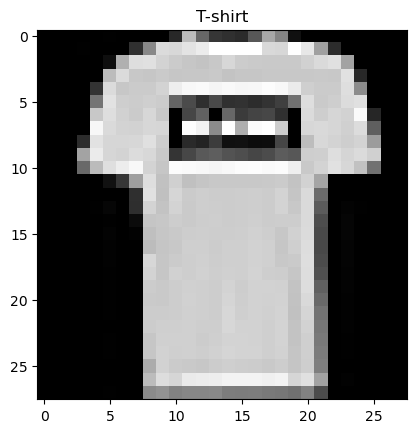

In [36]:
# Plot the second training image

image = Image.open(image_path)
plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(data_name.iloc[1, 0])
plt.show()

<a name="4.2"></a>
### <font color='#2471a3'> <b> 4.2. Create a dataset class </b> </font>

We will use the components in the last section to build a dataset class and then create an object.

In [37]:
class Dataset(Dataset):
    """
    A custom dataset class for loading images and applying transformations.
    """
    
    # constructor
    def __init__(self, csv_file, data_dir, transform=None):
        """
        Initialize the dataset.
        
        Args:
            csv_file (str): Name of the CSV file containing image information.
            data_dir (str): Directory where the images are stored.
            transform (callable, optional): A function/transform to apply to the images.
        """
        
        # Image directory
        self.data_dir = data_dir
        
        # The transform is going to be used on image
        self.transform = transform
        
        data_dircsv_file = os.path.join(self.data_dir, csv_file)
        
        # load CSV file that contains image info
        self.data_name = pd.read_csv(data_dircsv_file)
        
        # number of images in the dataset
        self.len = self.data_name.shape[0]
        
        
    # get the length
    def __len__(self):
        """
        Return the number of samples in the dataset.
        """
        return self.len
    
    # getter
    def __getitem__(self, idx):
        """
        Retrieve an image and its corresponding label.
        
        Args:
            idx (int): Index of the sample to retrieve.
        
        Returns:
            tuple: (image, label)
        """
        
        # image file path
        img_name = os.path.join(self.data_dir, self.data_name.iloc[idx, 1])
        
        # open image file
        image = Image.open(img_name)
        
        # The class label for the image
        y = self.data_name.iloc[idx, 0]
        
        # if there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)
            
        return image, y
    


In [38]:
csv_file, directory

('index.csv', 'data')

In [39]:
# create a dataset object
dataset = Dataset(csv_file=csv_file, data_dir=directory)

Each sample of the image and the class y is stored in a tuple <code> dataset[sample]</code> . The image is the first element in the tuple <code> dataset[sample][0]</code> the label or class is the second element in the tuple <code> dataset[sample][1]</code>. For example you can plot the first image and class.

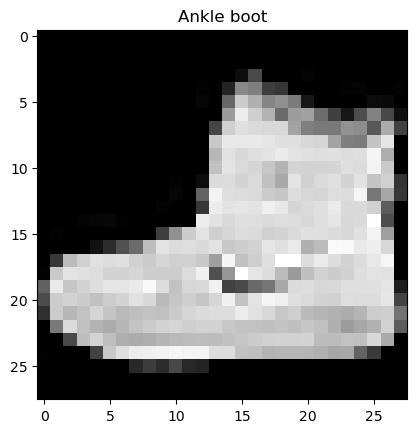

In [40]:
image = dataset[0][0]
y = dataset[0][1]

plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(y)
plt.show()

<a name="4.3"></a>
### <font color='#2471a3'> <b> 4.3. Torchvision transforms </b> </font>

In [41]:
import torchvision.transforms as transforms

We can apply some image transform functions on the dataset object. 

For example, the image can be:

- cropped
- converted to a tensor. 

We can use <code>transform.Compose</code> to combine the two transform functions.

In [42]:
# Combine two transforms: crop and convert to tensor. Apply the compose to MNIST dataset

croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file , data_dir=directory,transform=croptensor_data_transform )
print("The shape of the first element tensor: ", dataset[0][0].shape)

The shape of the first element tensor:  torch.Size([1, 20, 20])


We can see the image is now 20 x 20.

In [52]:
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + data_sample[1])

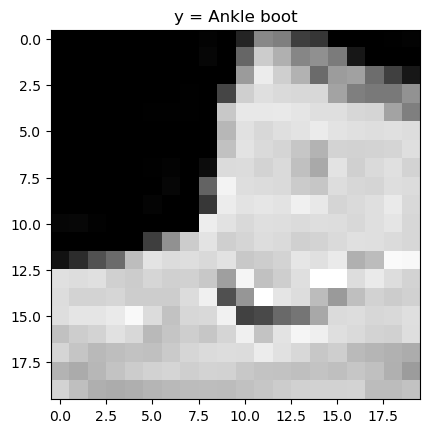

In [44]:
show_data(dataset[0],shape = (20, 20))

In the below example, we Vertically flip the image, and then convert it to a tensor. Use <code>transforms.Compose()</code> to combine these two transform functions. Plot the flipped image.

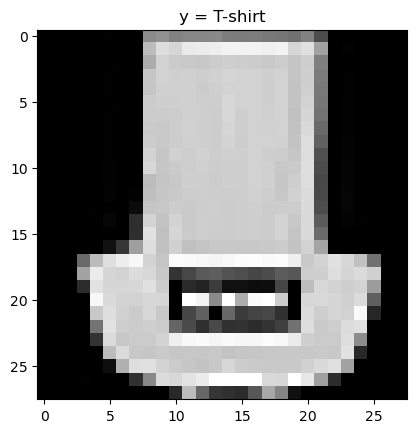

In [45]:
# Construct the compose. Apply it on MNIST dataset. Plot the image out.
fliptensor_data_transform = transforms.Compose([transforms.RandomVerticalFlip(p=1),transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file , data_dir=directory,transform=fliptensor_data_transform )

show_data(dataset[1])

<a name="5"></a>
## <font color='blue'> <b> 5. Built-in datasets </b> </font>

Torchvision provides many built-in datasets. In this example we will use the MNIST dataset.

In [46]:
import torchvision.datasets as dsets

In [56]:
dataset = dsets.MNIST(
    root = './data', 
    train = False, 
    download = True, 
    transform = transforms.ToTensor()
)

In [57]:
# Examine whether the elements in dataset MNIST are tuples, and what is in the tuple?

print(f"Type of the first element: {type(dataset[0])}")
print(f"The length of the tuple: {len(dataset[0])}")
print(f"The shape of the first element in the tuple: {dataset[0][0].shape}")
print(f"The type of the first element in the tuple: {type(dataset[0][0])}")
print(f"The second element in the tuple: {dataset[0][1]}")
print(f"The type of the second element in the tuple: {type(dataset[0][1])}")
print("As a result, the structure of the first element in the dataset is (tensor([1, 28, 28]), tensor(7)).")


Type of the first element: <class 'tuple'>
The length of the tuple: 2
The shape of the first element in the tuple: torch.Size([1, 28, 28])
The type of the first element in the tuple: <class 'torch.Tensor'>
The second element in the tuple: 7
The type of the second element in the tuple: <class 'int'>
As a result, the structure of the first element in the dataset is (tensor([1, 28, 28]), tensor(7)).


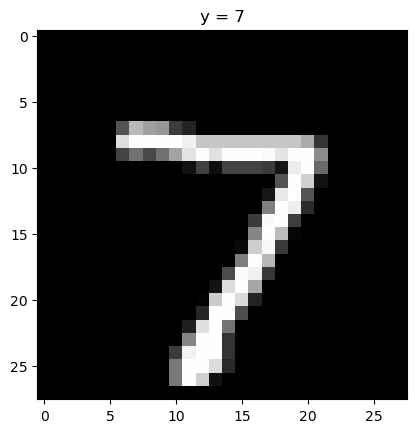

In [58]:
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + str(data_sample[1])) #.item()

show_data(dataset[0])

In [59]:
# Combine two transforms: crop and convert to tensor. Apply the compose to MNIST dataset

croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', train = False, download = True, transform = croptensor_data_transform)
print("The shape of the first element in the first tuple: ", dataset[0][0].shape)

The shape of the first element in the first tuple:  torch.Size([1, 20, 20])


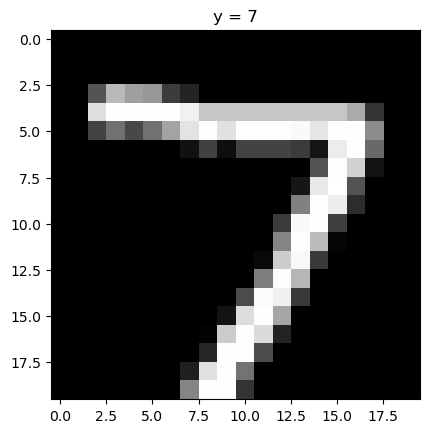

In [60]:
show_data(dataset[0],shape = (20, 20))

<a name="references"></a>
## <font color='blue'> <b> References </b> </font>

[IBM AI Engineering Professional Certificate](https://www.coursera.org/professional-certificates/ai-engineer)